In [1]:
import minerva_ann_datasets

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/perdue/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
def decode_eventid(eventid):
    """
    assume encoding from fuel_up_nukecc.py, make_hdf5_fuelfiles.py, etc.
    """
    eventid = str(eventid)
    phys_evt = eventid[-2:]
    eventid = eventid[:-2]
    gate = eventid[-4:]
    eventid = eventid[:-4]
    subrun = eventid[-4:]
    eventid = eventid[:-4]
    run = eventid
    return (run, subrun, gate, phys_evt)

In [19]:
def make_plots(dstream, save_figs=False, prediction=None):
    evt_counter = 0
    for data in dstream.get_epoch_iterator():
        eventid, inputu, inputv, inputx, nhads = data[0], data[1], data[2], data[3], data[4]
        run, subrun, gate, phys_evt = decode_eventid(eventid[0])
        fig = plt.figure(figsize=(18, 6))
        gs = plt.GridSpec(1, 3)
        for i, imgdata in enumerate([inputx, inputu, inputv]):
            ax = plt.subplot(gs[i])
            ax.axis('off')
            ax.imshow(imgdata[0][0])
            if prediction is None:
                plt.title('{} - {} - {} - {}: {}'.format(run, subrun, gate, phys_evt, nhads[0]))
            else:
                plt.title('{} - {} - {} - {}: p {} / t {}'.format(
                        run, subrun, gate, phys_evt, prediction[evt_counter], nhads[0]))
            if save_figs:
                figname = 'evt_%s_%s_%s_%s_nhad_%d.pdf' % (run, subrun, gate, phys_evt, nhads[0])
                plt.savefig(figname)
        evt_counter += 1

In [20]:
fname = '../minosmatch_hadmult_127x50x25_xuv_me1Bmc.hdf5'

In [21]:
# choose a bigger tslice for more events to display
tslice = (0, 12)
dset = minerva_ann_datasets.load_datasubset(fname, 'test', tslice)
print dset.num_examples
_, dstream = minerva_ann_datasets.make_scheme_and_stream(dset, 1, shuffle=False)

12


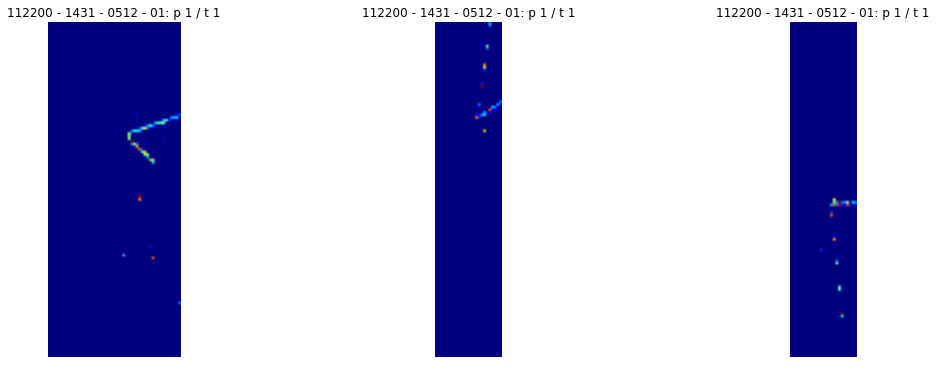

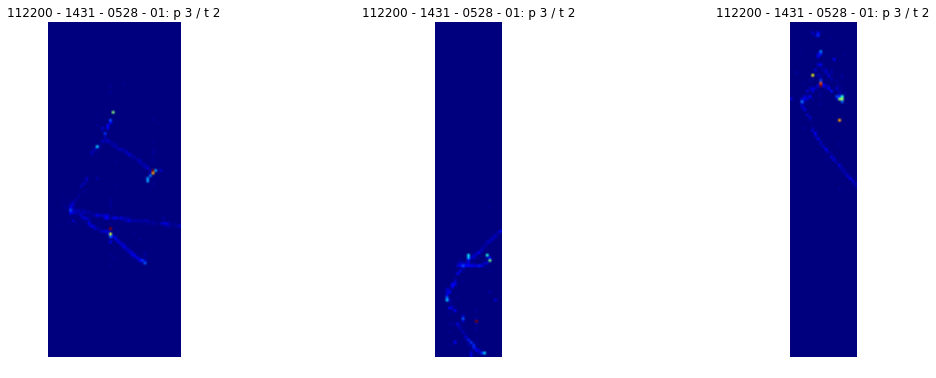

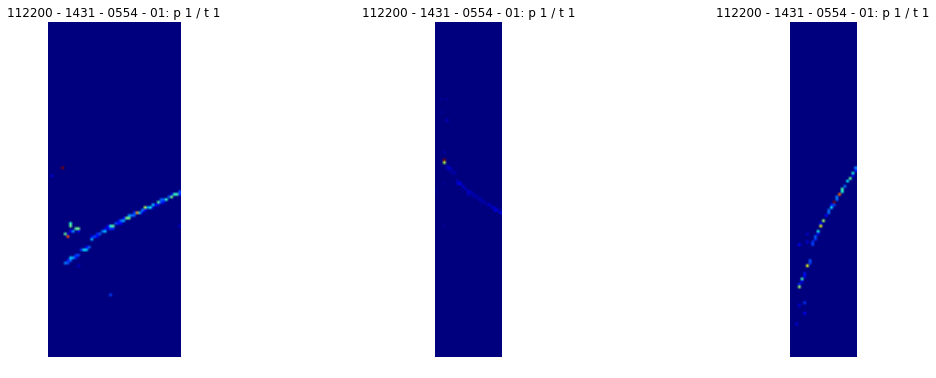

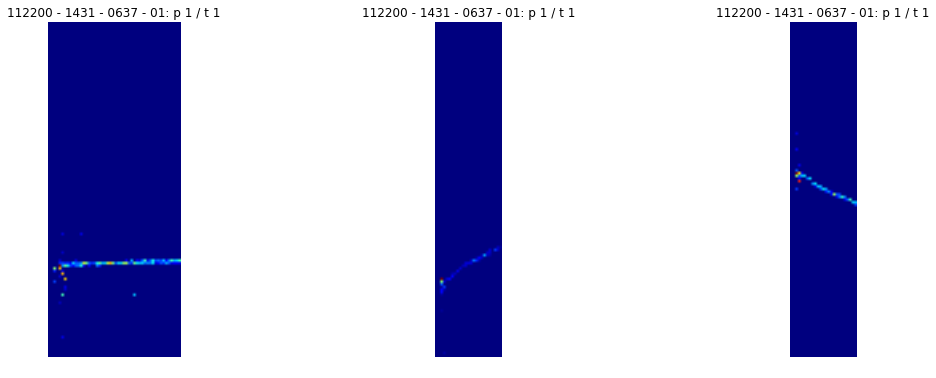

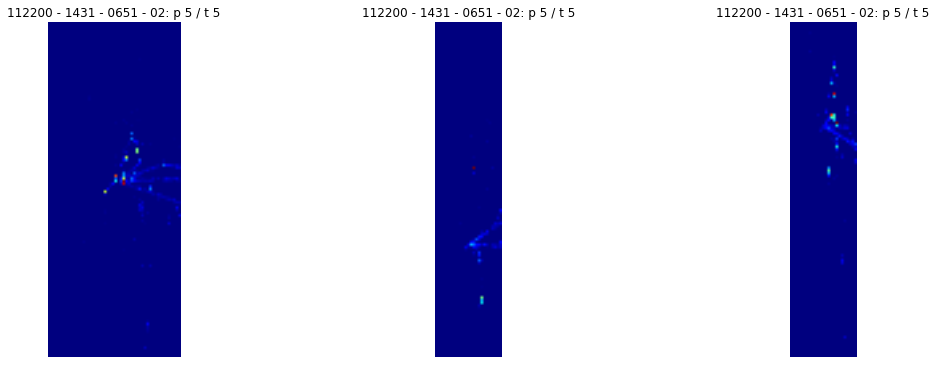

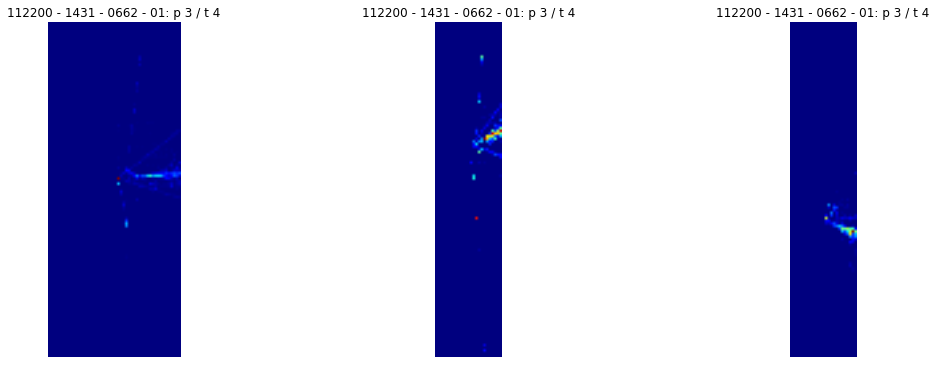

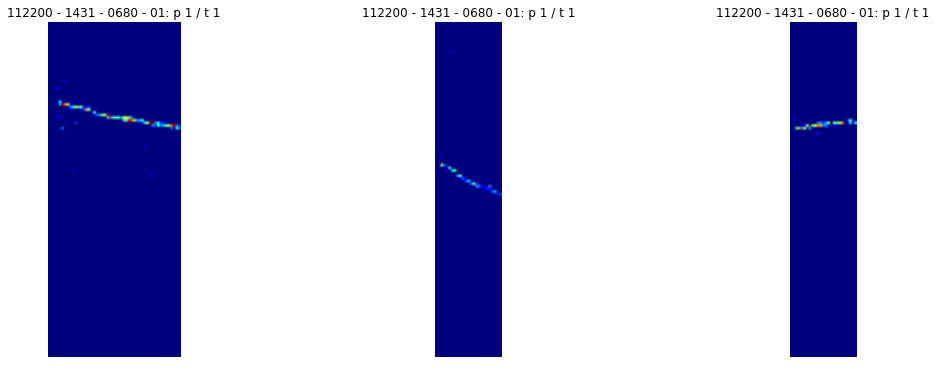

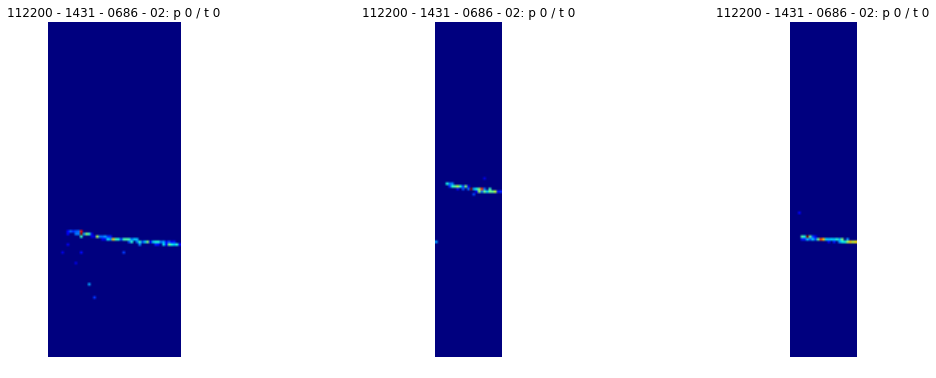

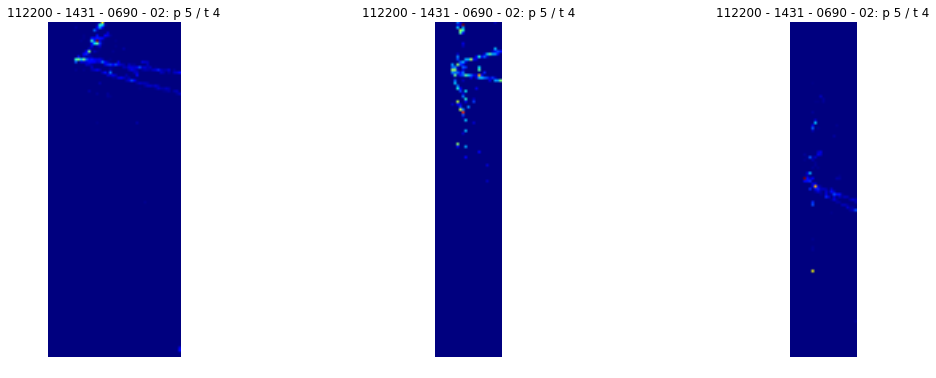

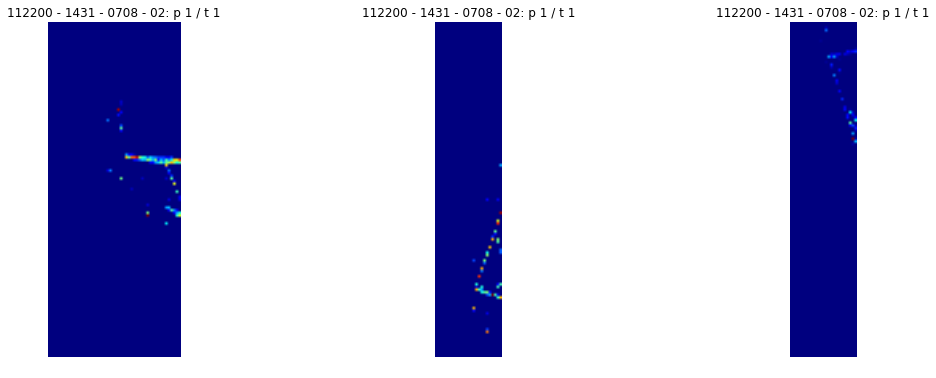

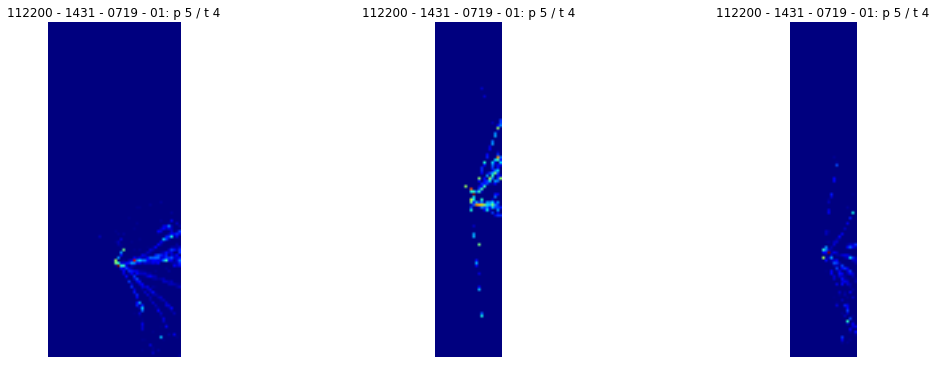

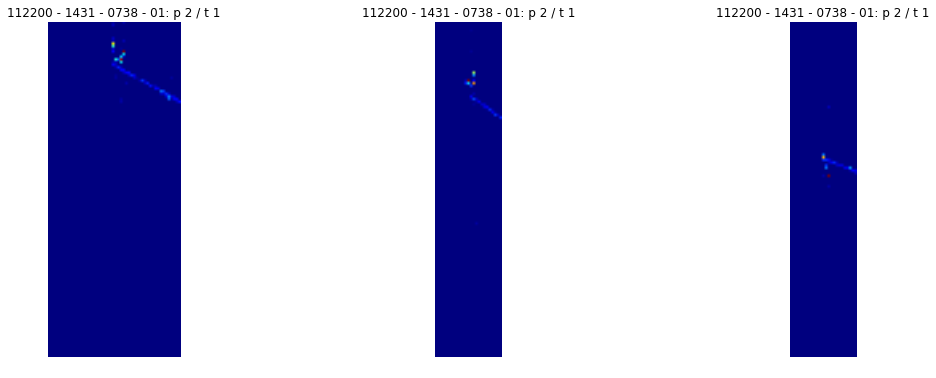

In [23]:
prediction = [1, 3, 1, 1, 5, 3, 1, 0, 5, 1, 5, 2]
make_plots(dstream, save_figs=True, prediction=prediction)

In [28]:
tslice = (12, 24)
dset = minerva_ann_datasets.load_datasubset(fname, 'test', tslice)
print dset.num_examples
_, dstream = minerva_ann_datasets.make_scheme_and_stream(dset, 1, shuffle=False)

12


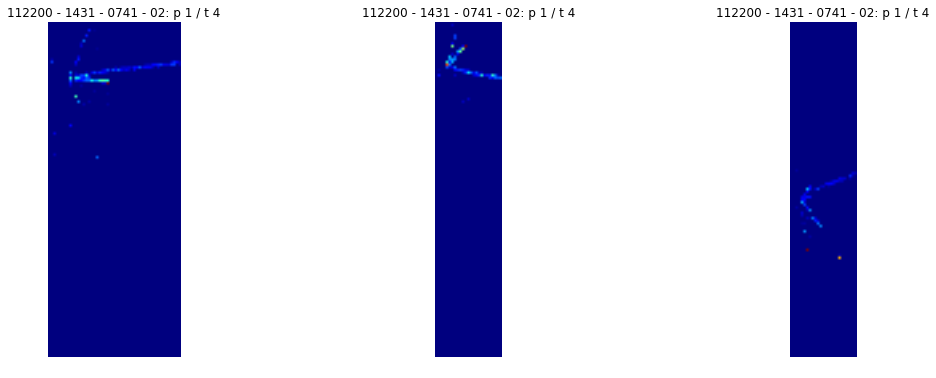

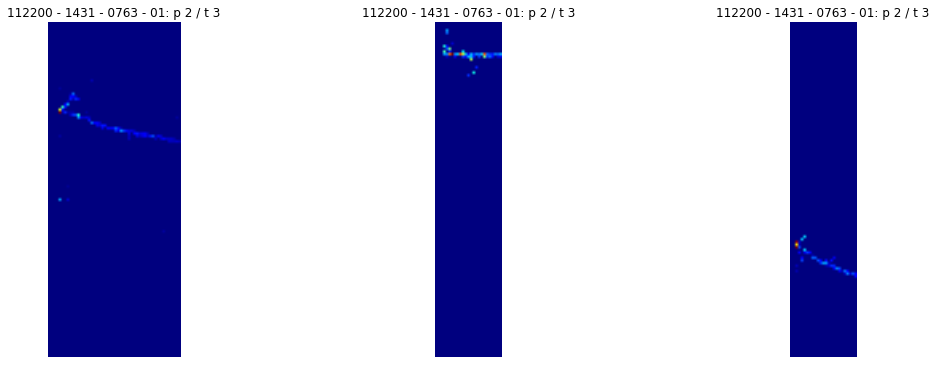

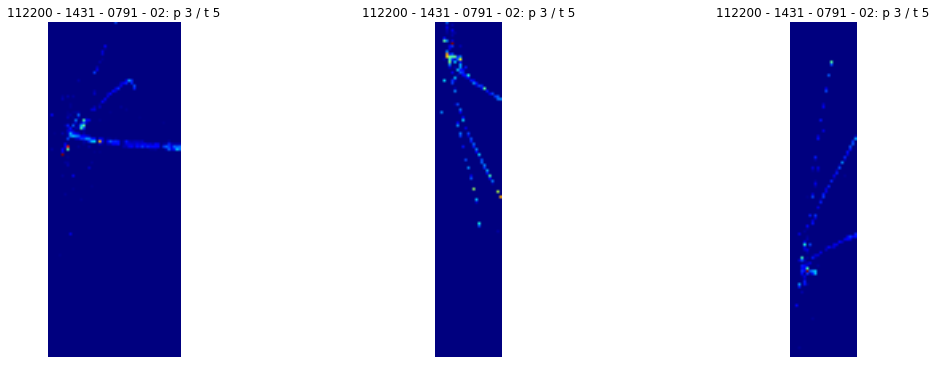

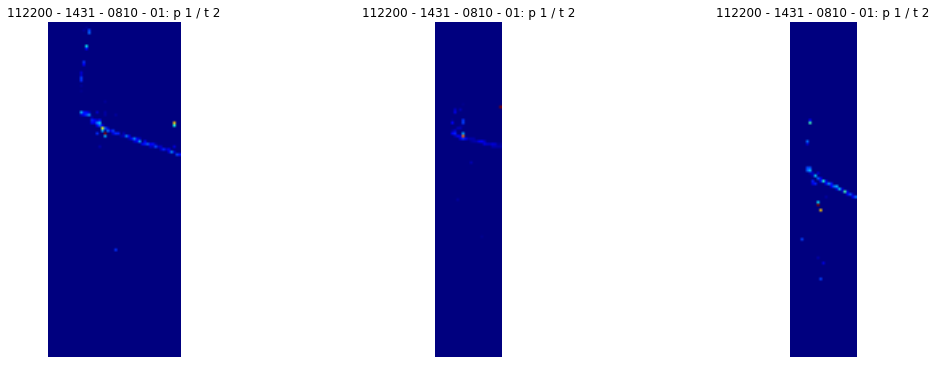

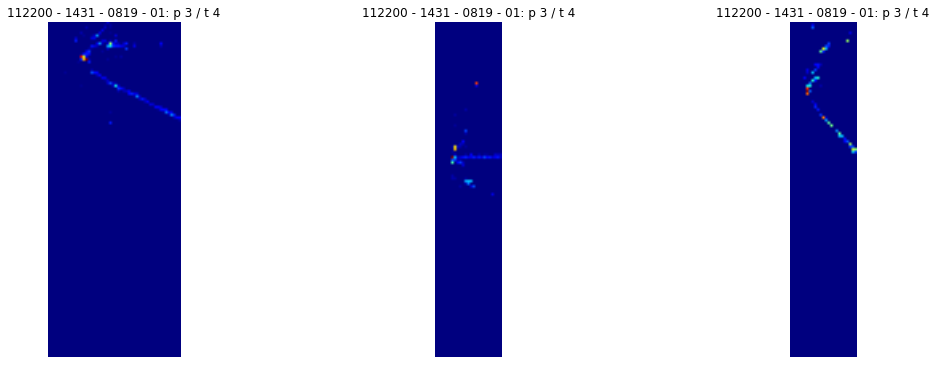

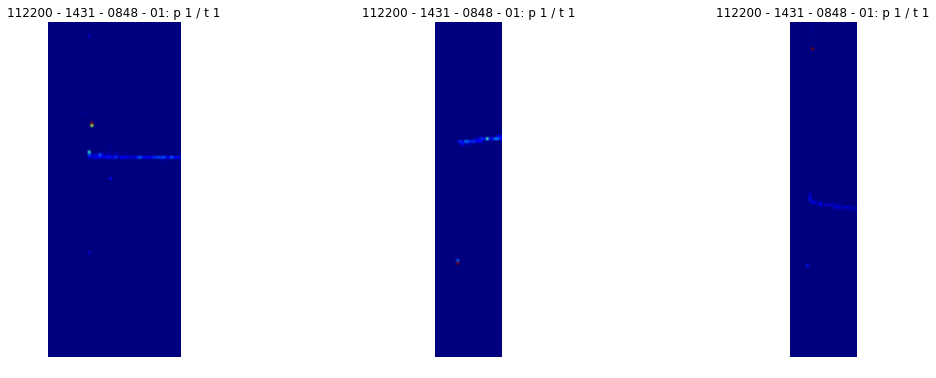

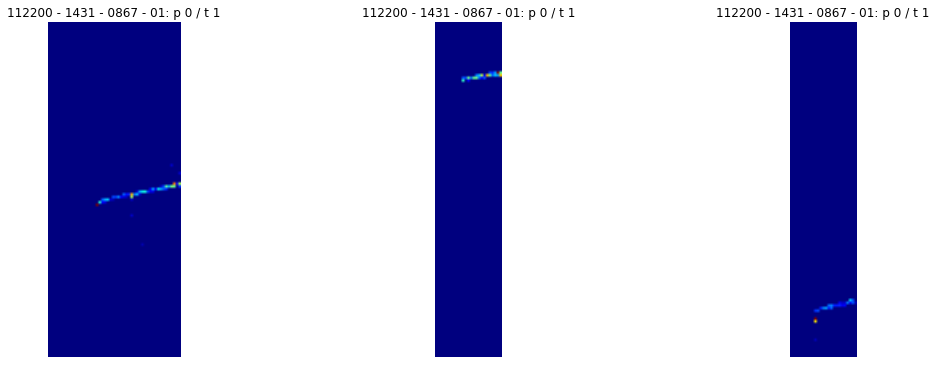

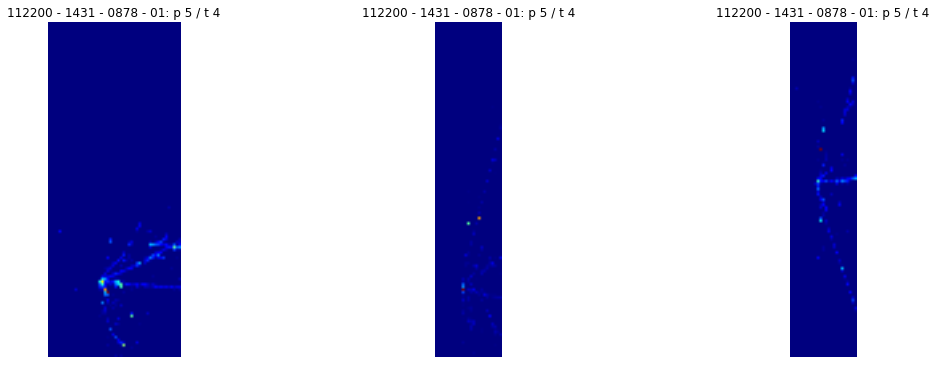

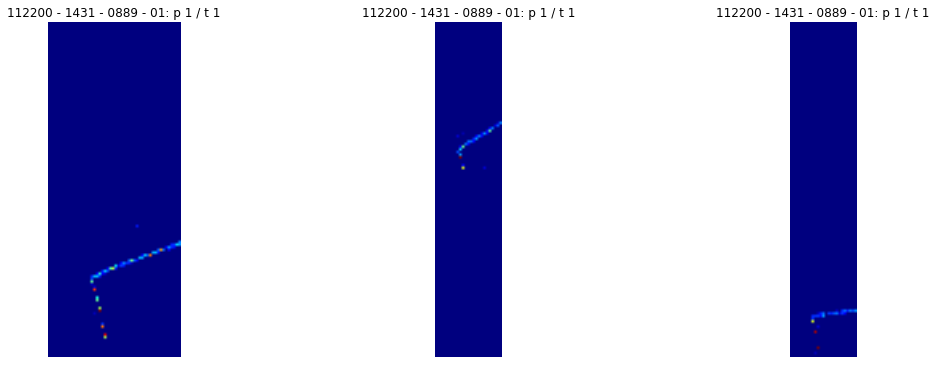

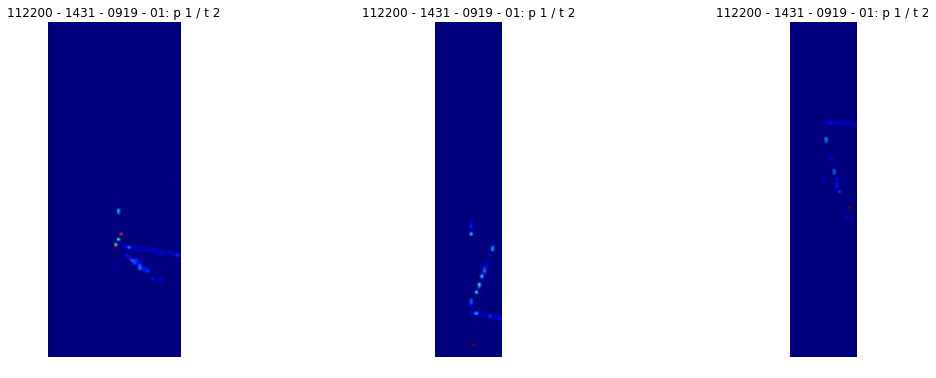

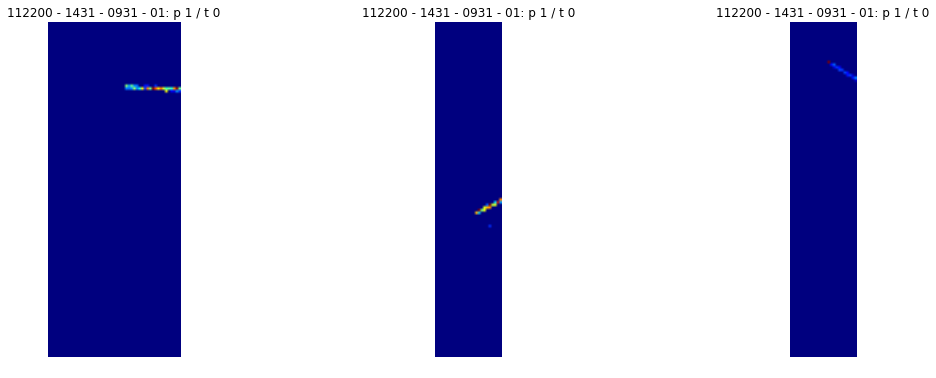

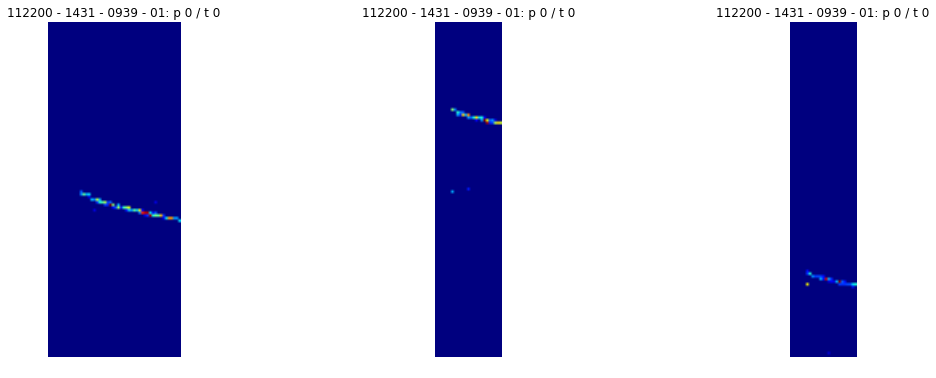

In [29]:
prediction = [1, 2, 3, 1, 3, 1, 0, 5, 1, 1, 1, 0]
make_plots(dstream, save_figs=True, prediction=prediction)

In [42]:
tslice = (199, 209)
dset = minerva_ann_datasets.load_datasubset(fname, 'train', tslice)
print dset.num_examples
_, dstream = minerva_ann_datasets.make_scheme_and_stream(dset, 1, shuffle=False)

10


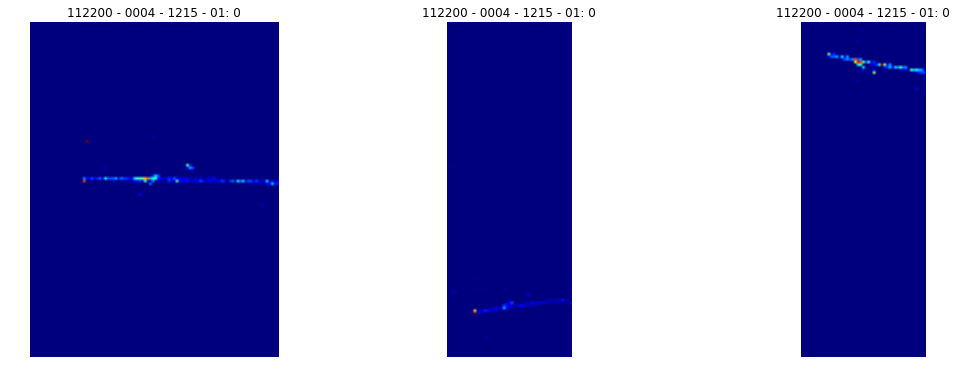

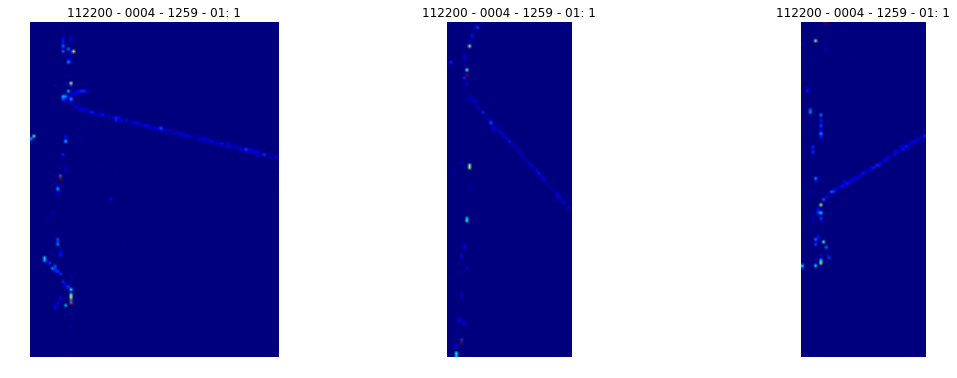

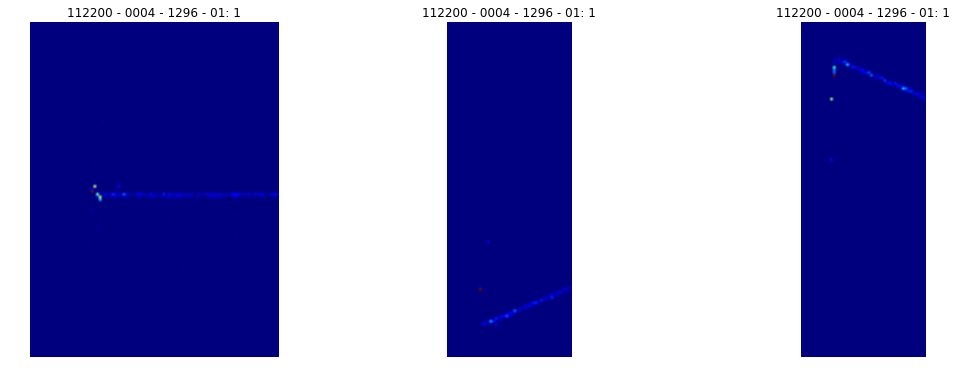

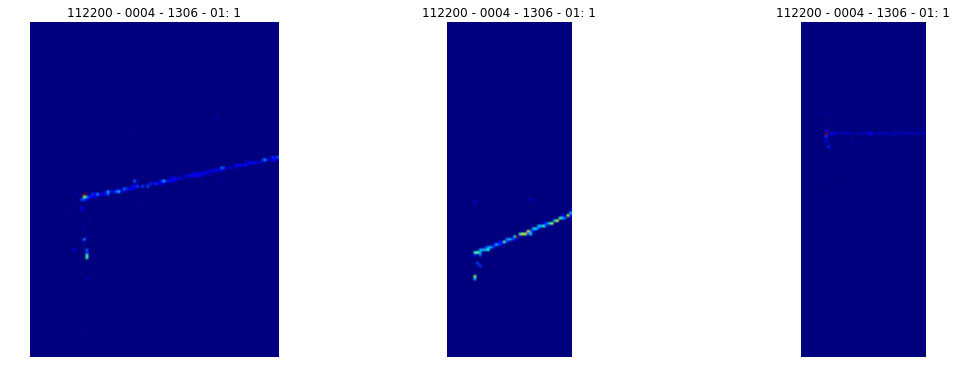

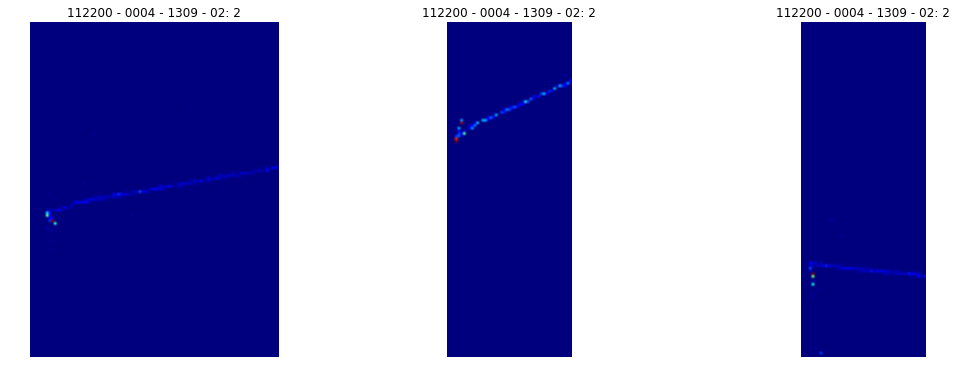

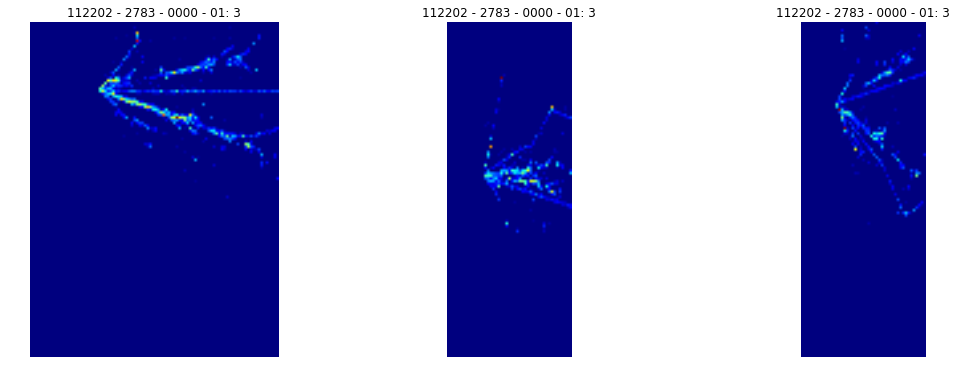

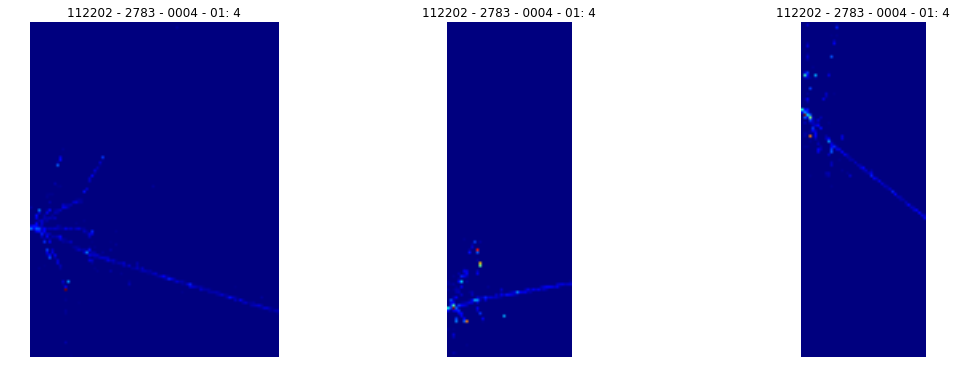

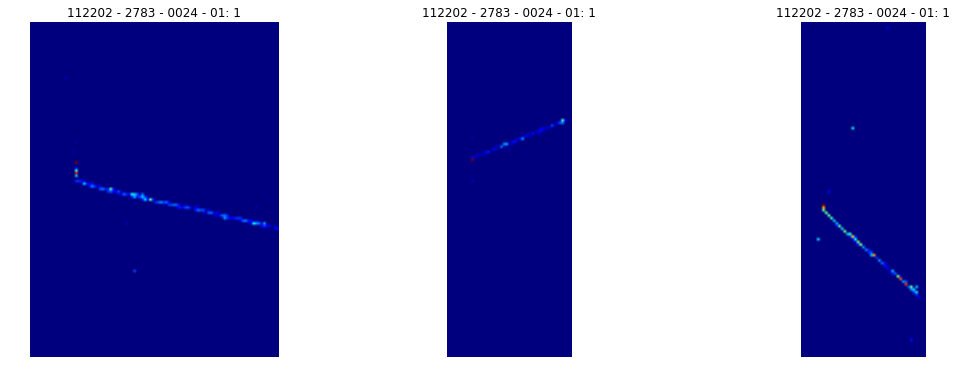

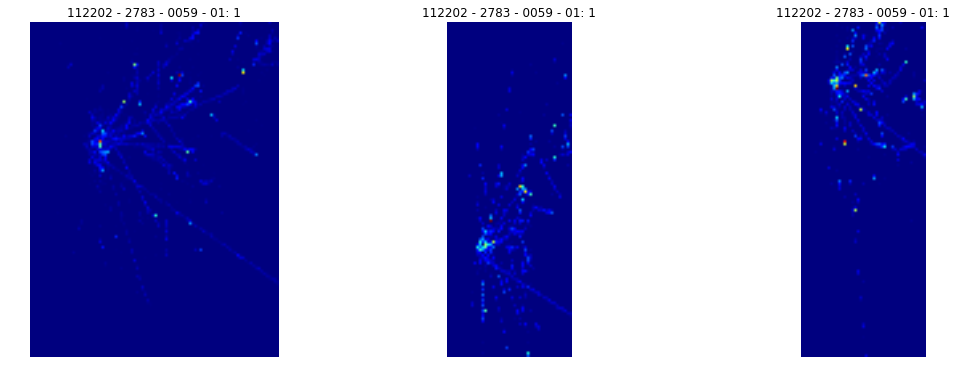

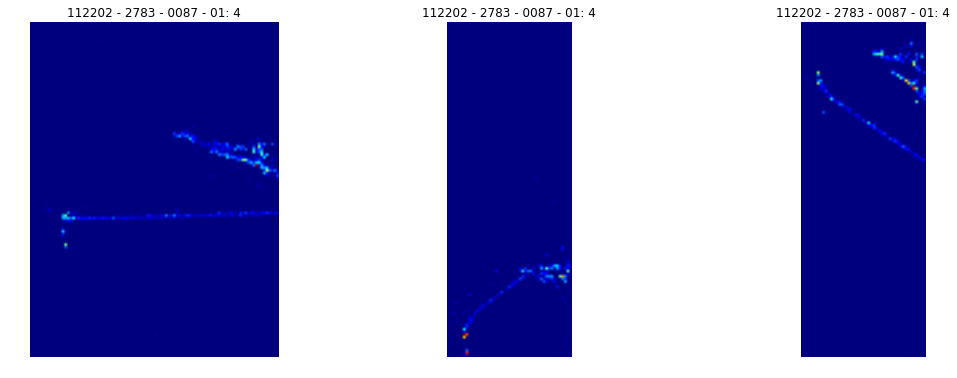

In [43]:
make_plots(dstream)